In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire
import prepare

#ignore minor warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = acquire.get_data(query_url = False)
print(df.shape)
df = prepare.prepare_dataframe(df)
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (6719, 60), (6719, 60))

# Question 1
Does legality effect the price?

## Key takeaway
- The legality of a card does have an effect on price
- The effect is disproportionate among the legalities
- The difference of the price is dependent on what legalities the card is in

## Discusion
At least 3 sentences explanation
context goes here

The goal was to find tangable differences in price based off of its legality. 

## Visualization

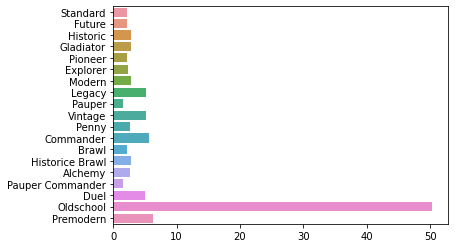

In [12]:
#functions go here
"""
To hammer out the visuals here I will have to go over the code that has gotten me the results:
To do so would require starting with identifying where tey meet
I started from the top and got all of the peices assembled
"""
def get_legalites_chart(df):

    train['standard'] = train.legalities.apply(lambda r : r['standard'])
    train['future'] = train.legalities.apply(lambda r : r['future'])
    train['historic'] = train.legalities.apply(lambda r : r['historic'])
    train['gladiator'] = train.legalities.apply(lambda r : r['gladiator'])
    train['pioneer'] = train.legalities.apply(lambda r : r['pioneer'])
    train['explorer'] = train.legalities.apply(lambda r : r['explorer'])
    train['modern'] = train.legalities.apply(lambda r : r['modern'])
    train['legacy'] = train.legalities.apply(lambda r : r['legacy'])
    train['pauper'] = train.legalities.apply(lambda r : r['pauper'])
    train['vintage'] = train.legalities.apply(lambda r : r['vintage'])
    train['penny'] = train.legalities.apply(lambda r : r['penny'])
    train['commander'] = train.legalities.apply(lambda r : r['commander'])
    train['brawl'] = train.legalities.apply(lambda r : r['brawl'])
    train['historicbrawl'] = train.legalities.apply(lambda r : r['historicbrawl'])
    train['alchemy'] = train.legalities.apply(lambda r : r['alchemy'])
    train['paupercommander'] = train.legalities.apply(lambda r : r['paupercommander'])
    train['duel'] = train.legalities.apply(lambda r : r['duel'])
    train['oldschool'] = train.legalities.apply(lambda r : r['oldschool'])
    train['premodern'] = train.legalities.apply(lambda r : r['premodern'])

    smu = train[train.standard == 'legal'].usd.mean()
    fmu = train[train.future == 'legal'].usd.mean()
    hmu = train[train.historic == 'legal'].usd.mean()
    gmu = train[train.gladiator == 'legal'].usd.mean()
    pmu = train[train.pioneer == 'legal'].usd.mean()
    emu = train[train.explorer == 'legal'].usd.mean()
    mmu = train[train.modern == 'legal'].usd.mean()
    lmu = train[train.legacy == 'legal'].usd.mean()
    pamu = train[train.pauper == 'legal'].usd.mean()
    vmu = train[train.vintage == 'legal'].usd.mean()
    pemu = train[train.penny == 'legal'].usd.mean()
    cmu = train[train.commander == 'legal'].usd.mean()
    bmu = train[train.brawl == 'legal'].usd.mean()
    hmu = train[train.historicbrawl == 'legal'].usd.mean()
    amu = train[train.alchemy == 'legal'].usd.mean()
    pcmu = train[train.paupercommander == 'legal'].usd.mean()
    dmu = train[train.duel == 'legal'].usd.mean()
    omu = train[train.oldschool == 'legal'].usd.mean()
    premu = train[train.premodern == 'legal'].usd.mean()

    unrounded_answers = {"Standard": [smu],
            "Future": [fmu],
            "Historic": [hmu],
            "Gladiator": [gmu],
            "Pioneer": [pmu],
            "Explorer": [emu],
            "Modern": [mmu],
            "Legacy": [lmu],
            "Pauper": [pamu],
            "Vintage": [vmu],
            "Penny": [pemu],
            "Commander": [cmu],
            "Brawl": [bmu],
            "Historice Brawl": [hmu],
            "Alchemy": [amu],
            "Pauper Commander": [pcmu],
            "Duel": [dmu],
            "Oldschool": [omu],
            "Premodern": [premu]}

    answers = pd.DataFrame.from_dict(unrounded_answers)
    answers

    sns.barplot(data = answers, orient = "h")
    
get_legalites_chart(df)
#xlabel
#ylabel
#title


## Hypothesis Testing

- Null hypothesis: There is no correlation between legality and usd
- Alternative hypothesis: There is a correlation between legality and price


In [13]:
#functions go here
alpha = .05

t, p = stats.ttest_1samp(train.usd, train[train.standard == "legal"].usd.mean())
print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

10.036785439379459 5.599619248138624e-24 0.05
We reject the null hypothesis


# Question 2
Is there a difference in price between sets?

## Key takeaway
- There is a large difference in price between some sets
- Most of the sets that have gone through standard are roughly worth the same

## Discusion
The initial assumption going into this is that not all sets are worth the same amount. Some more then others. Some in the class of comodeities 

## Visualization

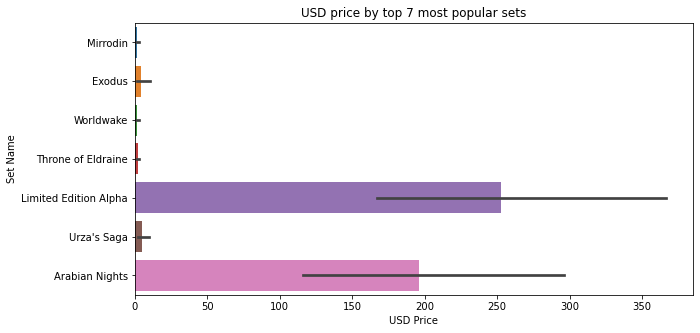

In [23]:
def top_7_sets(train):
    top7 = train[(train['set_name'] == 'Mirrodin') | (train['set_name'] == "Throne of Eldraine") | (train['set_name'] == "Worldwake") | (train['set_name'] == "Exodus") | (train['set_name'] == "Urza\'s Saga") | (train['set_name'] == "Arabian Nights") | (train['set_name'] == "Limited Edition Alpha")]
    plt.figure(figsize=(10,5))
    sns.barplot(data = top7, x=top7.usd, y=top7.set_name)
    plt.title('USD price by top 7 most popular sets')
    plt.xlabel('USD Price')
    plt.ylabel('Set Name')
    plt.show()
top_7_sets(train)

## Hypothesis Testing
- Null hypothesis: There is no correlation between set_name and usd
- Alternative hypothesis: There is a correlation between set_name and price

In [24]:
#functions go here
alpha = .05

t, p = stats.ttest_1samp(train.usd, train[train.set_name == "Mirrodin"].usd.mean())
print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

11.116220871223732 5.75770128334448e-29 0.05
We reject the null hypothesis


# Question 3
What would be the "best" card to buy? for the laymen

## Key takeaway
- key takeaway 1

## Discusion
At least 3 sentences explanation

## Visualization

In [17]:
#functions go here

## Hypothesis Testing

In [18]:
#functions go here